# <font color="blue">Lesson 3 Basic Models</font>

# Testing Classification Algorithms on the Same Dataset

I'm using a KFold validation on the Pima Indian Tribe Diabetes Dataset (downloaded from Kaggle) with several classification algorithms. The Pima indians have a prevalence for diabetes due to a change from their traditional diet (and dancing--they happen to like polka dancing). The test is binary (diabetes == true or diabetes == false).

Don't worry about the "details" for now. Just focus on the testing of the accuracy of these side by side. This is a method you can use to identify the best classifier for a particular type of problem.

**Linear**
* Logistic Regression Classification <--yes you can do this!
* Linear Discriminant Analysis (or LDA)

**Nonlinear**
* kNN Classifier
* Naive Bayes Classifier
* Classification tree 
* Support Vector Classifier (SVC)

In [1]:
# Load data file
import pandas as pd
 
data = pd.read_csv("https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/diabetes.csv", header=0) 

X = data.iloc[:, 0:8]   # load features into X DF
Y = data.iloc[:, 8]     # Load target into Y DF

# Add with viewing the data
pd.set_option('display.width', 100) 
pd.set_option('precision', 2)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


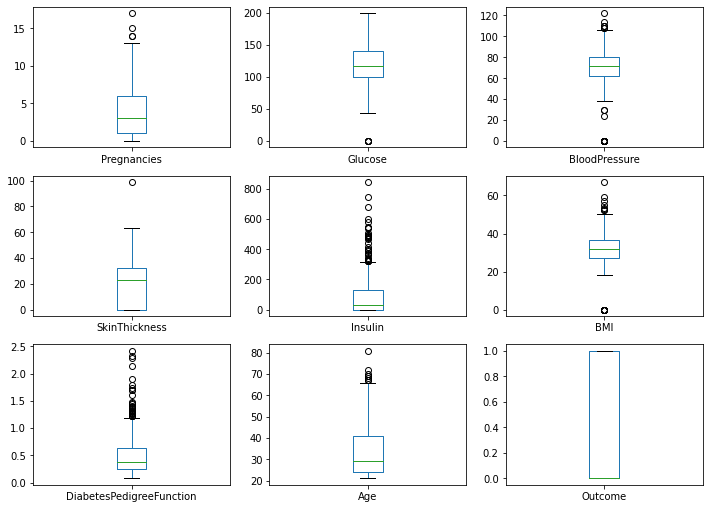

In [2]:
from matplotlib import pyplot

data.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(12,15))
pyplot.show()

## Linear ML Algorithms

### Logistic Regression Classification
Assumes a normal distribution for the independent variables and models binary classification problems. 

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=None)  # 10 fold cross validation ; 
                                            # 7 random state is to assure consistent results
log_reg_results = cross_val_score(LogisticRegression(max_iter=10000), X, Y, cv=kfold, scoring='accuracy') 
print("Accuracy-> mean:%.3f%% (std:%.3f)" % (log_reg_results.mean()*100, log_reg_results.std()))

Accuracy-> mean:77.604% (std:0.052)


### Linear Discriminant Analysis
Binary and mulit-class classification. Also assumes a normal distribution. 

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_results = cross_val_score(LinearDiscriminantAnalysis(), X, Y, cv=kfold) 
print("Accuracy: %.3f%% (std:%.3f)" % (lda_results.mean()*100, lda_results.std()))

Accuracy: 77.346% (std:0.052)


## Non-linear ML Algorithms
### k-Nearest Neighbors (kNN) 
kNN's use a distance metric to find the k most similar inputs in the training data for a new instance. The *mean outcome* of the neighbors is the prediction. 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kNN_results = cross_val_score(KNeighborsClassifier(), X, Y, cv=kfold) 
print("Accuracy-> mean:%.3f%% (std:%.3f)" % (kNN_results.mean()*100, kNN_results.std()))

Accuracy-> mean:72.656% (std:0.062)


### Naive Bayes
Calculates the probability of each class and the conditional probability of each class given an input value. These probabilities are estimated for new data and multiplied together. The reason it is called *Naive* is that it assumes that all of the inputs are independent. When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function.

In [9]:
from sklearn.naive_bayes import GaussianNB

nbc_results = cross_val_score(GaussianNB(), X, Y, cv=kfold)
print("Accuracy: %.3f%% (std:%.3f)" % (nbc_results.mean()*100, nbc_results.std()))

Accuracy: 75.518% (std:0.043)


### Classification and Regression Trees (CART)
These ML algorithms construct a binary tree from the training data. Split points are decided greedily, evaluating each attribute in order to minimize the cost function (default is Gini index). 

In [10]:
from sklearn.tree import DecisionTreeClassifier

CART_results = cross_val_score(DecisionTreeClassifier(), X, Y, cv=kfold)
print("Accuracy-> mean:%.3f%% (std:%.3f)" % (CART_results.mean()*100, CART_results.std()))

Accuracy-> mean:70.176% (std:0.061)


### Support Vector Machines
Creates the best possible (most optimal) division between two classes of data. 

In [11]:
from sklearn.svm import SVC

svc_results = cross_val_score(SVC(), X, Y, cv=kfold)
print("Accuracy: %.3f%% (std:%.3f)" % (svc_results.mean()*100, svc_results.std()))

Accuracy: 76.042% (std:0.053)


In [12]:
print("LogReg Accuracy-> %.3f%% (std:%.3f)" % (log_reg_results.mean()*100, log_reg_results.std()))
print("LDA    Accuracy-> %.3f%% (std:%.3f)" % (lda_results.mean()*100, lda_results.std()))
print("kNN    Accuracy-> %.3f%% (std:%.3f)" % (kNN_results.mean()*100, kNN_results.std()))
print("NBC    Accuracy-> %.3f%% (std:%.3f)" % (nbc_results.mean()*100, nbc_results.std()))
print("CART   Accuracy-> %.3f%% (std:%.3f)" % (CART_results.mean()*100, CART_results.std()))
print("SVC    Accuracy-> %.3f%% (std:%.3f)" % (svc_results.mean()*100, svc_results.std()))

LogReg Accuracy-> 77.604% (std:0.052)
LDA    Accuracy-> 77.346% (std:0.052)
kNN    Accuracy-> 72.656% (std:0.062)
NBC    Accuracy-> 75.518% (std:0.043)
CART   Accuracy-> 70.176% (std:0.061)
SVC    Accuracy-> 76.042% (std:0.053)


What does this tell us about the dataset?